# Project 2: Features, Galore: A Linear Regression Analysis on Home Features Predicting Sale Price

---

## Training Data Import and Cleaning Continued 

This section examines the pre-cleaned Ames, Iowa Housing Dataset. This page will cover all cleaning and pre-processing that needs to happen after the train-test-split for validation/training on the Linear Regression model. Pre-processing for this dataset includes imputing null values, handling ordinal values, one-hot-encoding categorical features so they can be ran through a Linear Regression model, scaling X_train and X_test data and using a Variance Inflation Factor function to rid of any multi-collinear features. VIF will help to eliminate noise on the model. Finally, summary statistics of the cleaned and pre-processed split data will be analyzed.   

---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('../datasets/pre_cleaning.csv')

In [4]:
data.head()

,Unnamed: 0,id,pid,ms_sub_class,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,...,mo_sold,yr_sold,sale_type,sale_price,has_wood_deck,has_open_porch,has_enclosed_porch,has_3season_porch,has_screen_porch,has_pool
0,0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,...,3,2010,WD,130500,0,1,0,0,0,0
1,1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,...,4,2009,WD,220000,0,1,0,0,0,0
2,2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,...,1,2010,WD,109000,0,1,0,0,0,0
3,3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,...,4,2010,WD,174000,1,0,0,0,0,0
4,4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,...,3,2010,WD,138500,0,1,0,0,0,0


In [5]:
data.drop(columns='Unnamed: 0', inplace=True)

In [6]:
data.head()

,id,pid,ms_sub_class,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,mo_sold,yr_sold,sale_type,sale_price,has_wood_deck,has_open_porch,has_enclosed_porch,has_3season_porch,has_screen_porch,has_pool
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,3,2010,WD,130500,0,1,0,0,0,0
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,4,2009,WD,220000,0,1,0,0,0,0
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,1,2010,WD,109000,0,1,0,0,0,0
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,4,2010,WD,174000,1,0,0,0,0,0
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,3,2010,WD,138500,0,1,0,0,0,0


## Post-Split Data Cleaning and Pre-Processing

The column 'ms_sub_class' will be converted to an object, as indicated in the data dictionary. 

After implementing a train-test-split for the model to prevent data leakage, I will impute median values into the numerical columns of this dataset. Median values were chosen because the numerical columns do not follow a normal distribution. Using the median will better account for outliers in this data. 

I will then replace all null values in the categorical columns with 0. Upon inspection, categorical values that are missing from this dataset show that the feature does not exist. This imputer method will work for both ordinal and nominal values for this reason. 

Ordinal columns will then be ran through a function that imputes a numerical, ordered value to each unique feature based on rank shown in the data dictionary. 

Pandas "get dummies" function will then be applied to nominal categorical features to one-hot-encode these categories. The first of every category will be dropped to reduce the noise and redundancy of the model. 

Prior to using the Standard Scaler class, X_train and X_test datasets will be compared in shape. Any columns not present in both sets of data will be dropped. This is necessary because X_train and X_test must have the same number of columns before being scaled.   

X_train and X_test will then be scaled using Standard Scaler.

X_train will then run through the VIF function to eliminate any columns that are multi-collinear. This will help to reduce the noise in the model. These dropped columns will also then be dropped from the X_test data as these datasets need to have the same number of columns to be run through the Linear Regression models. 

Finally, non multi-collinear features correlated to sale price will be examined using a heatmap. Features with correlation less than or equal to -0.3 and greater than or equal to 0.3 (strong correlation) will be pulled out for modeling. 

---

In [7]:
#Making data ms_sub_class an object
data['ms_sub_class']=data['ms_sub_class'].astype('str')

In [8]:
data['ms_sub_class'].dtypes

dtype('O')

In [9]:
#Setting Variables 
X=data.drop(columns='sale_price')
y=data['sale_price']

In [10]:
#Setting train test split 
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

### Imputing Numerical Features 

In [11]:
#Handeling missing values in numerical columns for X training data by filling median 

#Replace null values with median in 'Lot Frontage'
X_train['lot_frontage']=X_train['lot_frontage'].replace(np.nan, X_train['lot_frontage'].median())

#Replace null values with median in 'Bsmt Full Bath'
X_train['bsmt_full_bath']=X_train['bsmt_full_bath'].replace(np.nan, X_train['bsmt_full_bath'].median())

#Replace null values with median in 'Bsmt Half Bath'
X_train['bsmt_half_bath']=X_train['bsmt_half_bath'].replace(np.nan, X_train['bsmt_half_bath'].median())

#Replace null values with median in 'Garage Yr Blt'
X_train['garage_yr_blt']=X_train['garage_yr_blt'].replace(np.nan, X_train['garage_yr_blt'].median())

In [12]:
#Handeling missing values in numerical columns for X test data by filling median 
X_test['lot_frontage']=X_test['lot_frontage'].replace(np.nan, X_test['lot_frontage'].median())

#Replace null values with median in 'Bsmt Full Bath'
X_test['bsmt_full_bath']=X_test['bsmt_full_bath'].replace(np.nan, X_test['bsmt_full_bath'].median())

#Replace null values with median in 'Bsmt Half Bath'
X_test['bsmt_half_bath']=X_test['bsmt_half_bath'].replace(np.nan, X_test['bsmt_half_bath'].median())

#Replace null values with median in 'Garage Yr Blt'
X_test['garage_yr_blt']=X_test['garage_yr_blt'].replace(np.nan, X_test['garage_yr_blt'].median())

### Imputing Categorical Features 

In [16]:
#Filling categorical columns in X_train with 0
X_train['alley']=X_train['alley'].replace(np.nan, 0)
X_train['mas_vnr_type']=X_train['mas_vnr_type'].replace(np.nan, 0)
X_train['bsmt_qual']=X_train['bsmt_qual'].replace(np.nan, 0)
X_train['bsmt_cond']=X_train['bsmt_cond'].replace(np.nan, 0)
X_train['bsmt_exposure']=X_train['bsmt_exposure'].replace(np.nan, 0)
X_train['bsmt_fin_type_1']=X_train['bsmt_fin_type_1'].replace(np.nan, 0)
X_train['bsmt_fin_type_2']=X_train['bsmt_fin_type_2'].replace(np.nan, 0)
X_train['fireplace_qu']=X_train['fireplace_qu'].replace(np.nan, 0)
X_train['garage_type']=X_train['garage_type'].replace(np.nan, 0)
X_train['garage_finish']=X_train['garage_finish'].replace(np.nan, 0)
X_train['garage_qual']=X_train['garage_qual'].replace(np.nan, 0)
X_train['pool_qc']=X_train['pool_qc'].replace(np.nan, 0)
X_train['fence']=X_train['fence'].replace(np.nan, 0)
X_train['misc_feature']=X_train['misc_feature'].replace(np.nan, 0)

In [18]:
#Filling categoricl columns in X_test with 0 
X_test['alley']=X_train['alley'].replace(np.nan, 0)
X_test['mas_vnr_type']=X_test['mas_vnr_type'].replace(np.nan, 0)
X_test['bsmt_qual']=X_test['bsmt_qual'].replace(np.nan, 0)
X_test['bsmt_cond']=X_test['bsmt_cond'].replace(np.nan, 0)
X_test['bsmt_exposure']=X_test['bsmt_exposure'].replace(np.nan, 0)
X_test['bsmt_fin_type_1']=X_test['bsmt_fin_type_1'].replace(np.nan, 0)
X_test['bsmt_fin_type_2']=X_test['bsmt_fin_type_2'].replace(np.nan, 0)
X_test['fireplace_qu']=X_test['fireplace_qu'].replace(np.nan, 0)
X_test['garage_type']=X_test['garage_type'].replace(np.nan, 0)
X_test['garage_finish']=X_test['garage_finish'].replace(np.nan, 0)
X_test['garage_qual']=X_test['garage_qual'].replace(np.nan, 0)
X_test['pool_qc']=X_test['pool_qc'].replace(np.nan, 0)
X_test['fence']=X_test['fence'].replace(np.nan, 0)
X_test['misc_feature']=X_test['misc_feature'].replace(np.nan, 0)

In [19]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1637 entries, 1957 to 1126
Data columns (total 77 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1637 non-null   int64  
 1   pid                 1637 non-null   int64  
 2   ms_sub_class        1637 non-null   object 
 3   ms_zoning           1637 non-null   object 
 4   lot_frontage        1637 non-null   float64
 5   lot_area            1637 non-null   int64  
 6   street              1637 non-null   object 
 7   alley               1637 non-null   object 
 8   lot_shape           1637 non-null   object 
 9   land_contour        1637 non-null   object 
 10  utilities           1637 non-null   object 
 11  lot_config          1637 non-null   object 
 12  land_slope          1637 non-null   object 
 13  neighborhood        1637 non-null   object 
 14  condition_1         1637 non-null   object 
 15  condition_2         1637 non-null   object 
 16  bld

### Handling Ordinal Columns 

In [20]:
#Handling ordinal columns

ordinal_dict = [
#Lot Shape
{'IR3': 1, 'IR2': 2, 'IR1': 3, 'Reg': 4},
    
#Utilities
{'AllPub':4,'NoSewr':3,'NoSeWa':2,'ELO':1},

#Land Slope
{'Gtl':3,'Mod':2,'Sev':1},
    
#Exter Qual
{'Ex':5,'Gd':4, 'TA':3, 'Fa':2,'Po':1}, 

#Exter Cond
{'Ex':5,'Gd':4, 'TA':3, 'Fa':2,'Po':1},

#Bsmt Qual
{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1, 0:0},
    
#Bsmt Cond
{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1, 0:0},
    
#Bsmt Exposure
{'Gd':4,'Av':3,'Mn':2,'No':1, 0:0},

#BsmtFin Type 1
{'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1, 0:0},

#BsmtFinType 2
{'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1, 0:0},

#HeatingQC 
{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},

#Electrical
{'SBrkr':5,'FuseA':4,'FuseF':3,'FuseP':2,'Mix':1},

#KitchenQual
{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1},

#Functional
{'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1},

#FireplaceQu
{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1, 0:0},

#Garage Finish
{'Fin':3,'RFn':2,'Unf':1, 0:0},

#Garage Qual
{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1, 0:0},

#Paved Drive
{'Y':3,'P':2,'N':1},

#Pool QC
{'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1, 0:0},

#Fence
{'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1, 0:0}
]

ordinal_columns = ['lot_shape', 'utilities', 'land_slope', 'exter_qual', 'exter_cond', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmt_fin_type_1', 'bsmt_fin_type_2',
       'heating_qc', 'electrical', 'kitchen_qual', 'functional',
       'fireplace_qu', 'garage_finish', 'garage_qual',
       'paved_drive', 'pool_qc', 'fence']

#zip column names to dictionary values
ordinal_dicts = dict(zip(ordinal_columns ,ordinal_dict))

def ordinal_replace(df,columns):
    for column in columns:
        df[column] = df[column].map(ordinal_dicts[column])
    return df


In [21]:
#Calling function on training data
X_train=ordinal_replace(X_train, ordinal_columns)
X_train.head()

,id,pid,ms_sub_class,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,misc_val,mo_sold,yr_sold,sale_type,has_wood_deck,has_open_porch,has_enclosed_porch,has_3season_porch,has_screen_porch,has_pool
1957,239,905452110,50,RL,50.0,9350,Pave,0,4,Bnk,...,0,6,2010,WD,0,0,0,0,0,0
1966,2443,528315030,60,RL,82.0,9452,Pave,0,4,Lvl,...,0,6,2006,WD,0,1,0,0,0,0
838,441,528120170,20,RL,77.0,10872,Pave,0,3,Lvl,...,0,2,2009,WD,1,1,0,0,0,0
427,1379,905103030,80,RL,80.0,13014,Pave,0,4,Lvl,...,0,12,2008,WD,1,0,0,0,0,0
1489,1218,534428020,20,RL,68.0,12493,Pave,0,3,Lvl,...,0,4,2008,WD,1,0,0,0,0,0


In [22]:
#Calling funciton on test data 
X_test=ordinal_replace(X_test, ordinal_columns)

### One-Hot-Encoding Categorical Features with 'get_dummies'

In [23]:
#Dummy X_train nominal columns 
X_train=pd.get_dummies(X_train, columns=['ms_sub_class','ms_zoning',
                                         'street', 'alley', 'land_contour', 'lot_config', 
                                         'neighborhood', 'condition_1', 'condition_2', 
                                         'bldg_type', 'house_style', 'roof_style', 'roof_matl', 
                                         'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 
                                         'foundation', 'heating', 'garage_type', 'misc_feature', 
                                         'sale_type'], drop_first=True)

In [24]:
X_train.head()

,id,pid,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,year_built,...,misc_feature_Shed,misc_feature_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
1957,239,905452110,50.0,9350,4,4,3,4,6,1947,...,0,0,0,0,0,0,0,0,0,1
1966,2443,528315030,82.0,9452,4,4,3,8,5,1997,...,0,0,0,0,0,0,0,0,0,1
838,441,528120170,77.0,10872,3,4,3,9,5,2006,...,0,0,0,0,0,0,0,0,0,1
427,1379,905103030,80.0,13014,4,4,3,6,5,1978,...,0,0,0,0,0,0,0,0,0,1
1489,1218,534428020,68.0,12493,3,4,3,4,5,1960,...,0,0,0,0,0,0,0,0,0,1


In [25]:
#Saving X_train for later
X_train.to_csv('X_train_pre_ss.csv')

In [26]:
#Dummy X_test nominal columns 
X_test=pd.get_dummies(X_test, columns=['ms_sub_class','ms_zoning',
                                         'street', 'alley', 'land_contour', 'lot_config', 
                                         'neighborhood', 'condition_1', 'condition_2', 
                                         'bldg_type', 'house_style', 'roof_style', 'roof_matl', 
                                         'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 
                                         'foundation', 'heating', 'garage_type', 'misc_feature', 
                                         'sale_type'], drop_first=True)

In [27]:
X_test.head(2)

,id,pid,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,year_built,...,garage_type_CarPort,garage_type_Detchd,misc_feature_Shed,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_WD
1475,1640,527252050,61.0,8035,3,4,3,9,5,2006,...,0,0,0,0,0,0,0,0,0,1
692,2883,911225110,60.0,8520,4,4,3,3,5,1916,...,0,0,0,0,0,0,0,0,0,1


### Scaling X_train and X_test with StandardScaler

In [28]:
#Scaling X_train and X_test, dropping ID and PID so that they don't scale 
X_train_pre_ss=X_train.drop(columns=['id', 'pid'])
X_train_ids=X_train[['id', 'pid']]

X_test_pre_ss=X_test.drop(columns=['id', 'pid'])
X_test_ids=X_test[['id', 'pid']]

#Instantiating Standard Scaler 
ss=StandardScaler()

In [29]:
X_train_pre_ss.shape

(1637, 203)

In [30]:
X_test_pre_ss.shape

(410, 181)

### Making X_train and X_test have the same columns to be put through the scaler

In [31]:
#Z_train and Z_test need to match in column length 
set(X_train_pre_ss.columns)-set(X_test_pre_ss.columns)

{'alley_Grvl',
 'alley_Pave',
 'condition_2_Feedr',
 'condition_2_PosA',
 'condition_2_PosN',
 'condition_2_RRAe',
 'condition_2_RRNn',
 'exterior_1st_CBlock',
 'exterior_1st_ImStucc',
 'exterior_1st_Stone',
 'exterior_2nd_CBlock',
 'foundation_Wood',
 'heating_OthW',
 'misc_feature_Gar2',
 'misc_feature_Othr',
 'misc_feature_TenC',
 'ms_sub_class_150',
 'ms_zoning_C (all)',
 'neighborhood_Blueste',
 'neighborhood_GrnHill',
 'neighborhood_Landmrk',
 'roof_matl_Membran',
 'roof_matl_WdShake',
 'roof_style_Shed',
 'sale_type_Oth'}

In [32]:
#Dropping columns in X_train that are not in X_test

X_train_pre_ss.drop(columns=['alley_Grvl','alley_Pave','condition_2_Feedr','condition_2_PosA','condition_2_PosN',
                             'condition_2_RRAe','condition_2_RRNn','exterior_1st_CBlock','exterior_1st_ImStucc',
                             'exterior_1st_Stone','exterior_2nd_CBlock','foundation_Wood','heating_OthW',
                             'misc_feature_Gar2','misc_feature_Othr','misc_feature_TenC','ms_sub_class_150',
                             'ms_zoning_C (all)','neighborhood_Blueste','neighborhood_GrnHill','neighborhood_Landmrk',
                             'roof_matl_Membran','roof_matl_WdShake','roof_style_Shed','sale_type_Oth'], inplace=True)

In [33]:
X_train_pre_ss.shape

(1637, 178)

In [34]:
set(X_test_pre_ss.columns)-set(X_train_pre_ss.columns)

{'condition_2_RRAn', 'exterior_1st_AsphShn', 'ms_zoning_I (all)'}

In [35]:
#Dropping columns in X_test that are not in X_train 
X_test_pre_ss.drop(columns=['condition_2_RRAn', 'exterior_1st_AsphShn', 'ms_zoning_I (all)'], inplace=True)

In [36]:
X_test_pre_ss.shape

(410, 178)

In [37]:
#Fitting the scaler 
Z_train_noid=pd.DataFrame(ss.fit_transform(X_train_pre_ss), 
                     columns=X_train_pre_ss.columns, index=X_train_pre_ss.index)
Z_test_noid=pd.DataFrame(ss.transform(X_test_pre_ss), 
                    columns=X_test_pre_ss.columns, index=X_test_pre_ss.index)

In [52]:
Z_train_noid.head()

,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,year_remod/add,exter_qual,exter_cond,...,garage_type_CarPort,garage_type_Detchd,misc_feature_Shed,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_WD
1957,-0.921358,-0.106446,0.718504,0.0,0.218298,-1.478840,0.389398,-0.268166,-0.695900,-0.228933,...,-0.060652,1.670135,-0.14781,-0.065532,-0.034975,-0.08947,-0.055351,-0.049492,-0.298588,0.395061
1966,0.643738,-0.089214,0.718504,0.0,0.218298,1.337753,-0.505889,0.644691,1.022332,-0.228933,...,-0.060652,-0.598754,-0.14781,-0.065532,-0.034975,-0.08947,-0.055351,-0.049492,-0.298588,0.395061
838,0.399191,0.150689,-1.039629,0.0,0.218298,2.041901,-0.505889,1.029051,1.022332,-0.228933,...,-0.060652,-0.598754,-0.14781,-0.065532,-0.034975,-0.08947,-0.055351,-0.049492,-0.298588,0.395061
427,0.545919,0.512571,0.718504,0.0,0.218298,-0.070544,-0.505889,-0.316211,-0.695900,-0.228933,...,-0.060652,-0.598754,-0.14781,-0.065532,-0.034975,-0.08947,-0.055351,-0.049492,-0.298588,0.395061
1489,-0.040992,0.424550,-1.039629,0.0,0.218298,-1.478840,-0.505889,-1.181023,-0.695900,-0.228933,...,-0.060652,-0.598754,-0.14781,-0.065532,-0.034975,-0.08947,-0.055351,-0.049492,-0.298588,0.395061


### Implementing the VIF Function

In [38]:
#This function came from the combined minds of (mostly) Frank, Amanda and Debbie 

def vif_dropper(df):  #input a dataframe
    
    while True:  #creating a while loop
        
        df_vif = pd.DataFrame()        # create blank dataframe and assigning it to vif_data
        df_vif["feature"] = df.columns 
        df_vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]

        v = df_vif[df_vif['VIF'] != float('inf')] #filter df for VIF values that are above 5 and not inf & saving to new df called v
    
        m = max([i for i in v['VIF']])   # for each of the VIF vals in v df, return the max
        print(m)
        if m < 5:
            break
            
        else:
            feature = df_vif.iloc[df_vif[df_vif['VIF'] == m].index]['feature'].values[0]
            df.drop(columns = feature,inplace =True)
            print(feature)
            
    return df   

In [39]:
#Running my dataframe through VIF function to get rid of certain columns 
vif_dropper(Z_train_noid)

110.48064234521242
ms_sub_class_20
84.82005464979918
exterior_2nd_VinylSd
67.8281164015636
garage_type_Attchd
50.63069521869291
house_style_1Story
45.292961952539535
roof_style_Gable
42.71605675146051
exterior_2nd_CmentBd
42.086964311798305
exterior_1st_MetalSd
36.63772975977981
ms_zoning_RL
30.352616669940303
house_style_2Story
24.55497596031226
house_style_SLvl
23.304741950684093
mas_vnr_type_None
22.344388809090546
bldg_type_2fmCon
17.254796255504537
pool_qc
16.17577862488013
exterior_1st_VinylSd
15.024612449516459
year_built
13.528308001821445
neighborhood_NAmes
13.498558449145362
exterior_1st_HdBoard
7.7539044530213515
exterior_2nd_Wd Sdng
7.383286518916731
ms_sub_class_60
6.965315236132073
foundation_PConc
6.788431667704911
exterior_2nd_Brk Cmn
6.307292796575768
ms_sub_class_75
6.138844264297184
neighborhood_Somerst
5.678660302777331
bsmt_qual
5.4358620443037955
fireplace_qu
4.959943521660933


,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,year_remod/add,exter_qual,exter_cond,...,garage_type_CarPort,garage_type_Detchd,misc_feature_Shed,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_WD
1957,-0.921358,-0.106446,0.718504,0.0,0.218298,-1.478840,0.389398,-0.268166,-0.695900,-0.228933,...,-0.060652,1.670135,-0.14781,-0.065532,-0.034975,-0.08947,-0.055351,-0.049492,-0.298588,0.395061
1966,0.643738,-0.089214,0.718504,0.0,0.218298,1.337753,-0.505889,0.644691,1.022332,-0.228933,...,-0.060652,-0.598754,-0.14781,-0.065532,-0.034975,-0.08947,-0.055351,-0.049492,-0.298588,0.395061
838,0.399191,0.150689,-1.039629,0.0,0.218298,2.041901,-0.505889,1.029051,1.022332,-0.228933,...,-0.060652,-0.598754,-0.14781,-0.065532,-0.034975,-0.08947,-0.055351,-0.049492,-0.298588,0.395061
427,0.545919,0.512571,0.718504,0.0,0.218298,-0.070544,-0.505889,-0.316211,-0.695900,-0.228933,...,-0.060652,-0.598754,-0.14781,-0.065532,-0.034975,-0.08947,-0.055351,-0.049492,-0.298588,0.395061
1489,-0.040992,0.424550,-1.039629,0.0,0.218298,-1.478840,-0.505889,-1.181023,-0.695900,-0.228933,...,-0.060652,-0.598754,-0.14781,-0.065532,-0.034975,-0.08947,-0.055351,-0.049492,-0.298588,0.395061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,-1.312632,-1.016388,0.718504,0.0,0.218298,-0.070544,-1.401176,-0.556437,-0.695900,-0.228933,...,-0.060652,-0.598754,-0.14781,-0.065532,-0.034975,-0.08947,-0.055351,-0.049492,-0.298588,0.395061
1294,1.230648,-0.121820,0.718504,0.0,0.218298,-1.478840,-1.401176,-1.661474,-0.695900,-0.228933,...,-0.060652,1.670135,-0.14781,-0.065532,-0.034975,-0.08947,-0.055351,-0.049492,-0.298588,0.395061
860,0.056827,-0.148683,0.718504,0.0,0.218298,0.633604,-0.505889,0.740781,1.022332,-0.228933,...,-0.060652,-0.598754,-0.14781,-0.065532,-0.034975,-0.08947,-0.055351,-0.049492,-0.298588,0.395061
1459,0.056827,0.087841,0.718504,0.0,0.218298,-0.774692,1.284685,0.981006,-0.695900,-0.228933,...,-0.060652,-0.598754,-0.14781,-0.065532,-0.034975,-0.08947,-0.055351,-0.049492,-0.298588,0.395061


### Dropping the same columns in X_test from VIF function

In [40]:
Z_test_noid.drop(columns=['ms_sub_class_20', 'exterior_2nd_VinylSd', 'garage_type_Attchd',
                         'house_style_1Story','roof_style_Gable', 'exterior_2nd_CmentBd',
                         'exterior_1st_MetalSd', 'ms_zoning_RL','house_style_2Story','house_style_SLvl',
                         'mas_vnr_type_None','bldg_type_2fmCon','pool_qc','exterior_1st_VinylSd',
                         'year_built', 'neighborhood_NAmes', 'exterior_1st_HdBoard',
                         'exterior_2nd_Wd Sdng', 'ms_sub_class_60', 'foundation_PConc',
                         'exterior_2nd_Brk Cmn','ms_sub_class_75', 'neighborhood_Somerst',
                         'bsmt_qual', 'fireplace_qu'], inplace=True)

In [41]:
#Join dataframes back together 
Z_train=pd.concat([X_train_ids, Z_train_noid], axis=1)
Z_test=pd.concat([X_test_ids, Z_test_noid], axis=1)

In [42]:
Z_train.head(2)

,id,pid,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,year_remod/add,...,garage_type_CarPort,garage_type_Detchd,misc_feature_Shed,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_WD
1957,239,905452110,-0.921358,-0.106446,0.718504,0.0,0.218298,-1.478840,0.389398,-0.268166,...,-0.060652,1.670135,-0.14781,-0.065532,-0.034975,-0.08947,-0.055351,-0.049492,-0.298588,0.395061
1966,2443,528315030,0.643738,-0.089214,0.718504,0.0,0.218298,1.337753,-0.505889,0.644691,...,-0.060652,-0.598754,-0.14781,-0.065532,-0.034975,-0.08947,-0.055351,-0.049492,-0.298588,0.395061


In [43]:
Z_test.head(2)

,id,pid,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,year_remod/add,...,garage_type_CarPort,garage_type_Detchd,misc_feature_Shed,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_WD
1475,1640,527252050,-0.383356,-0.328610,-1.039629,0.0,0.218298,2.041901,-0.505889,1.029051,...,-0.060652,-0.598754,-0.14781,-0.065532,-0.034975,-0.08947,-0.055351,-0.049492,-0.298588,0.395061
692,2883,911225110,-0.432266,-0.246671,0.718504,0.0,0.218298,-2.182989,-0.505889,-1.661474,...,-0.060652,-0.598754,-0.14781,-0.065532,-0.034975,-0.08947,-0.055351,-0.049492,-0.298588,0.395061


### Heatmap for non-correlated features with relation to sale price 

In [76]:
#Merging dataframes back together for heatmap 
heatmap_vars=pd.concat([Z_train, y_train], axis=1)

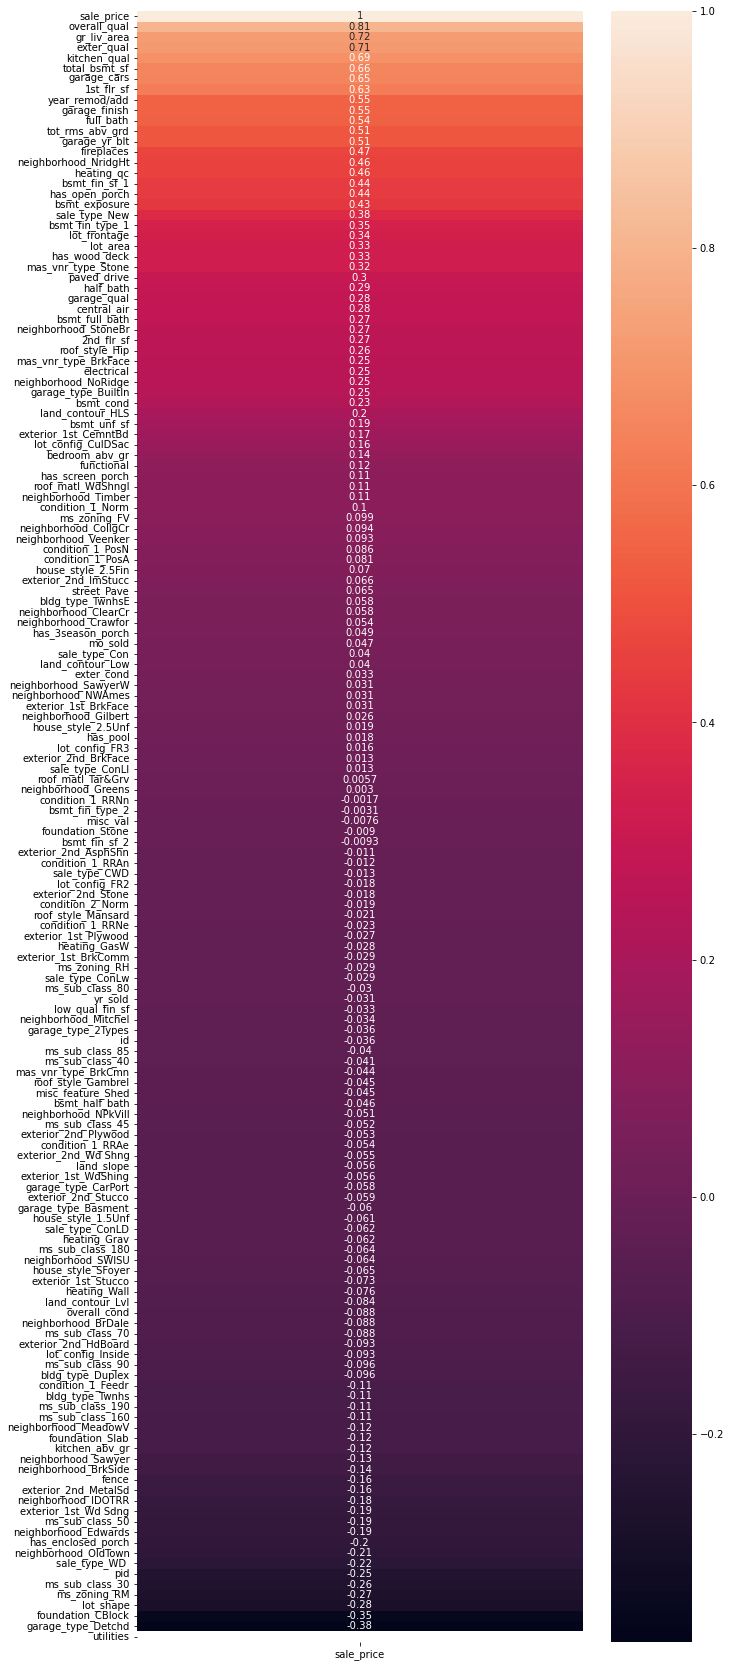

In [84]:
#Heatmap to look at correlated features 
plt.figure(figsize=(10,30))
sns.heatmap(heatmap_vars.corr()[['sale_price']].sort_values(by = 'sale_price',ascending=False), annot=True);

### The features that will be used for additional models where correlation threshold is <= -0.3 and >= 0.3 are: 
- **Greater than or equal to 0.3:** 'overall_qual', 'gr_liv_area', 'exter_qual', 'kitchen_qual', 'total_bsmt_sf', 'garage_cars', '1st_flr_sf', 'year_remod/add', 'garage_finish', 'full_bath', 'tot_rms_abv_grd', 'garage_yr_blt', 'fireplaces', 'neighborhood_NridgHt', 'heating_qc', 'bsmt_fin_sf_1', 'has_open_porch', 'bsmt_exposure', 'sale_type_New', 'bsmt_fin_type_1', 'lot_frontage', 'lot_area', 'has_wood_deck', 'mas_vnr_type_Stone'.
- **Less than or equal to -0.3:** 'garage_type_Detchd', 'foundation_CBlock'.

### Summary Statistics

The following tables show the summary statistics of Z_train, Z_test, y_train and y_test. There are no obvious values that look out of range. The minimum sale price for Z_train is 12,789 (USD), while the maximum sale price is 582,933 (USD). The minimum sale price for Z_test is 35,311 (USD), while the maximum sale price is 611,657 (USD).

In [47]:
#Summary statistics of fully cleaned data 
Z_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1637.0,1.483018e+03,8.438634e+02,1.000000e+00,7.660000e+02,1.489000e+03,2.216000e+03,2.930000e+03
pid,1637.0,7.152658e+08,1.887332e+08,5.263011e+08,5.284581e+08,5.354560e+08,9.071352e+08,9.241520e+08
lot_frontage,1637.0,-2.445610e-16,1.000306e+00,-2.339726e+00,-4.322656e-01,-4.099174e-02,4.481006e-01,1.194177e+01
lot_area,1637.0,-1.231622e-16,1.000306e+00,-1.466459e+00,-4.189960e-01,-9.799915e-02,2.554353e-01,1.776784e+01
lot_shape,1637.0,-6.879720e-16,1.000306e+00,-4.555894e+00,-1.039629e+00,7.185038e-01,7.185038e-01,7.185038e-01
...,...,...,...,...,...,...,...,...
sale_type_ConLD,1637.0,-2.209256e-17,1.000306e+00,-8.947025e-02,-8.947025e-02,-8.947025e-02,-8.947025e-02,1.117690e+01
sale_type_ConLI,1637.0,-9.171887e-17,1.000306e+00,-5.535093e-02,-5.535093e-02,-5.535093e-02,-5.535093e-02,1.806654e+01
sale_type_ConLw,1637.0,-1.280029e-16,1.000306e+00,-4.949222e-02,-4.949222e-02,-4.949222e-02,-4.949222e-02,2.020520e+01
sale_type_New,1637.0,8.850587e-17,1.000306e+00,-2.985884e-01,-2.985884e-01,-2.985884e-01,-2.985884e-01,3.349092e+00


In [48]:
Z_test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,410.0,1.434837e+03,8.469070e+02,1.200000e+01,7.120000e+02,1.457000e+03,2.124750e+03,2.927000e+03
pid,410.0,7.050079e+08,1.884804e+08,5.263510e+08,5.284581e+08,5.353542e+08,9.072000e+08,9.241001e+08
lot_frontage,410.0,-2.596109e-02,1.032026e+00,-2.339726e+00,-4.322656e-01,-4.099174e-02,5.459191e-01,5.143387e+00
lot_area,410.0,3.971304e-02,1.495607e+00,-1.436556e+00,-4.035375e-01,-7.637409e-02,2.607148e-01,2.517628e+01
lot_shape,410.0,5.384391e-02,9.539105e-01,-2.797762e+00,-1.039629e+00,7.185038e-01,7.185038e-01,7.185038e-01
...,...,...,...,...,...,...,...,...
sale_type_ConLD,410.0,-7.033403e-03,9.613649e-01,-8.947025e-02,-8.947025e-02,-8.947025e-02,-8.947025e-02,1.117690e+01
sale_type_ConLI,410.0,3.304856e-02,1.264140e+00,-5.535093e-02,-5.535093e-02,-5.535093e-02,-5.535093e-02,1.806654e+01
sale_type_ConLw,410.0,-9.053454e-05,1.000308e+00,-4.949222e-02,-4.949222e-02,-4.949222e-02,-4.949222e-02,2.020520e+01
sale_type_New,410.0,-8.506562e-02,8.573585e-01,-2.985884e-01,-2.985884e-01,-2.985884e-01,-2.985884e-01,3.349092e+00


In [50]:
y_train.describe().T

count      1637.000000
mean     181428.810629
std       77522.245011
min       12789.000000
25%      130000.000000
50%      164500.000000
75%      214000.000000
max      582933.000000
Name: sale_price, dtype: float64

In [51]:
y_test.describe().T

count       410.000000
mean     182003.990244
std       86129.484479
min       35311.000000
25%      128675.000000
50%      157250.000000
75%      213367.500000
max      611657.000000
Name: sale_price, dtype: float64

In [45]:
#Saving Pre-processed datasets to csv
Z_train.to_csv('z_train_cleaned.csv')
Z_test.to_csv('z_test_cleaned.csv')
y_train.to_csv('y_train_cleaned.csv')
y_test.to_csv('y_test_cleaned.csv')